In [7]:
import os
import tensorflow as tf
from tensorflow.core.util import event_pb2
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

figsize=(15, 10)
export_dir = './plots_evaluation/'
load_dir = './data_eval/'
filetype = 'pdf'

env_name = 'pc'
method = 'SP5'
config_list = ['s', 'm', 'l', 'o'] 

env_dict = {
    'c': 'chicken',
    'pc': 'pure_coordination',
    'pd': 'prisoners_dilemma',
    'sh': 'stag_hunt'
}
method_dict = {
    'SP5': '5 Seeds Self-Play',
    'PP3': '3 Seeds Population-Play',
    'PP5': '5 Seeds Population-Play',
    'FCP3': '3 Seeds Fictitious Co-Play',
    'FCP5': '5 Seeds Fictitious Co-Play'
}
config_dict = {
    's': 'Small',
    'm': 'Medium',
    'l': 'Large',
    'o': 'Obstacle'
}

sns.set()
sns.set_context("talk")
sns.set(rc={'figure.figsize':figsize})
sns.set_style("darkgrid", {"axes.facecolor":".93"})

In [8]:
plot_df = pd.DataFrame({'generation': [], 'reward': [], 'config': []})

for config in config_list:
    loaded = np.load(os.path.join(load_dir,f'{env_dict[env_name]}_{config.upper()}_{method}.npz'))
    rewards = loaded['rewards']  # shape of seed x gen x opp x ep
    for gen in np.arange(np.size(rewards, 1)):
        gen_rewards = rewards[:,gen,...].flatten()
        df_temp = pd.DataFrame({'generation': np.repeat(gen, len(gen_rewards)), 
                                'reward': gen_rewards,
                                'config': np.repeat(config_dict[config],len(gen_rewards))})
        plot_df = pd.concat([plot_df, df_temp], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: './data_eval/pure_coordination_S_SP5.npz'

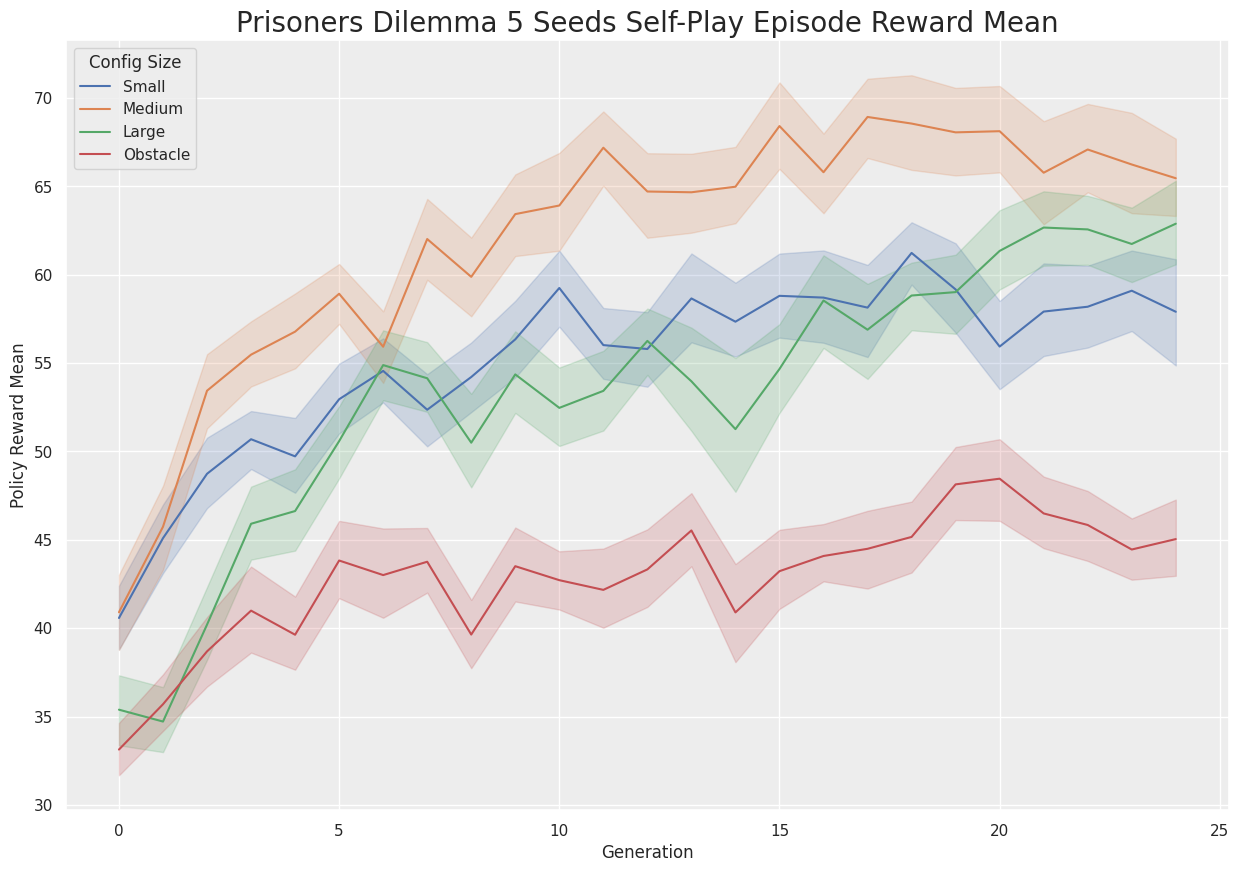

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(data=plot_df, x='generation', y='reward', hue='config')
ax.set(xlabel='Generation', ylabel='Policy Reward Mean')
ax.set_title((env_dict[env_name].replace('_',' ')+' '+method_dict[method]+' Episode Reward Mean').title(), fontsize=20, y=1.0)
# plt.xticks(np.arange(0, total_timestep, 2e5))
# xlabels = ['{:.1f}'.format(x) + 'M' for x in g.get_xticks()/1e6]
# g.set_xticklabels(xlabels)
plt.legend(title='Config Size')
plt.savefig(os.path.join(export_dir, env_dict[env_name].replace('_',' ')+' '+method+' eval.'+filetype), bbox_inches='tight')